In [1]:
# A demo of performFilter with real EEG data
import mne
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_dir = os.path.abspath(os.path.dirname(os.getcwd()))
testdata_dir = os.path.join(test_dir,'test_data','scalp_test.edf')
pyautomagic_dir = os.path.dirname(test_dir)

Update dir paths.

In [3]:
import sys
sys.path.append(pyautomagic_dir)
from pyautomagic.preprocessing import performFilter

Extracting EDF parameters from D:\JHU\NDD\pyautomagic\tests\test_data\scalp_test.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 47199  =      0.000 ...   235.995 secs...


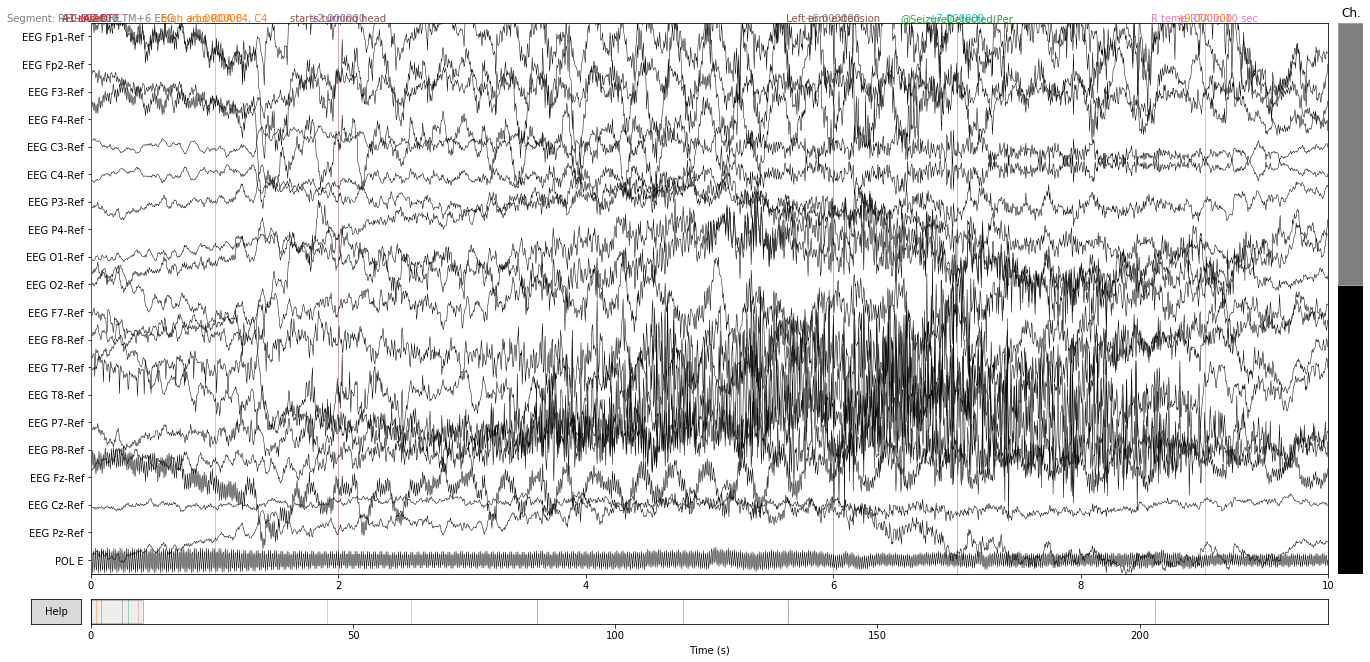

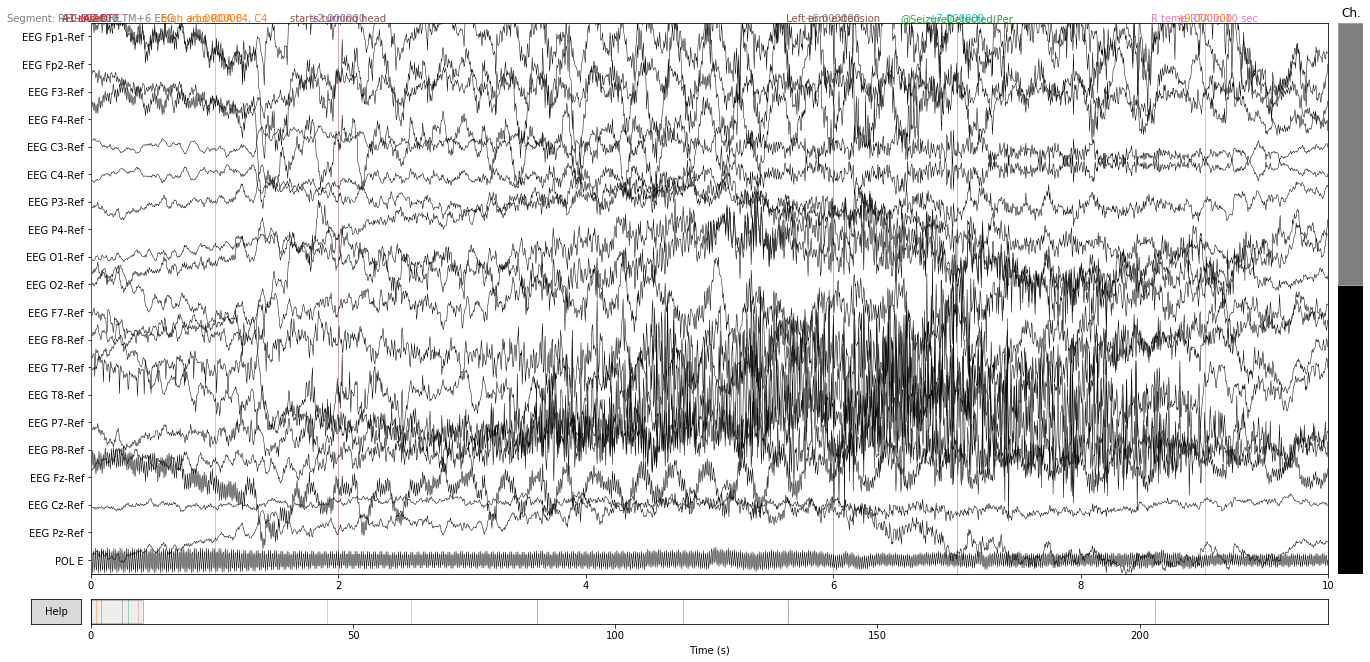

In [4]:
raw = mne.io.read_raw_edf(testdata_dir, preload=True)
raw.plot()

Load raw EEG data with MNE

In [5]:
# Filter data using Hamming windowed sinc FIR filter
EEG_raw = raw._data  #EEG data in ndarray(...,n_times)
sfreq = raw.info['sfreq']  #sampling frequency
times = raw.times  
EEG_lowpass_filt = performFilter.performFilter(EEG_raw, sfreq, 'low')
EEG_highpass_filt = performFilter.performFilter(EEG_raw, sfreq, 'high')
EEG_notch_filt = performFilter.performFilter(EEG_raw, sfreq, 'notch')

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 89 samples (0.445 sec)



Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 1321 samples (6.605 sec)



Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1321 samples (6.605 sec)



Text(0, 0.5, 'Frequency(Hz)')

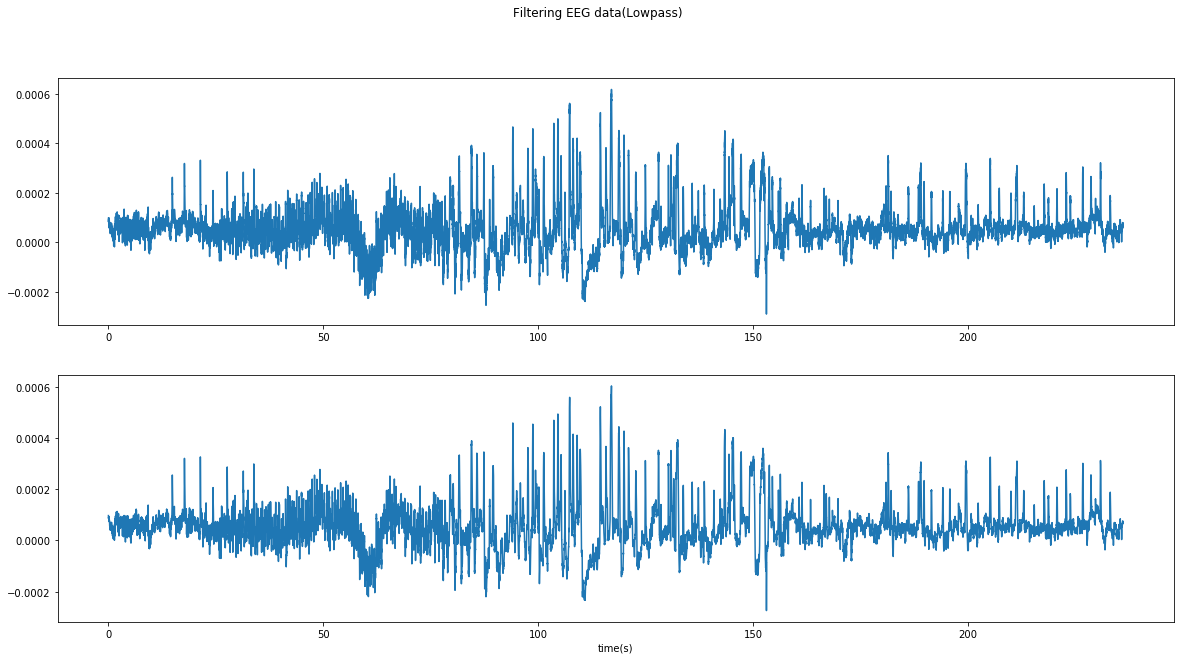

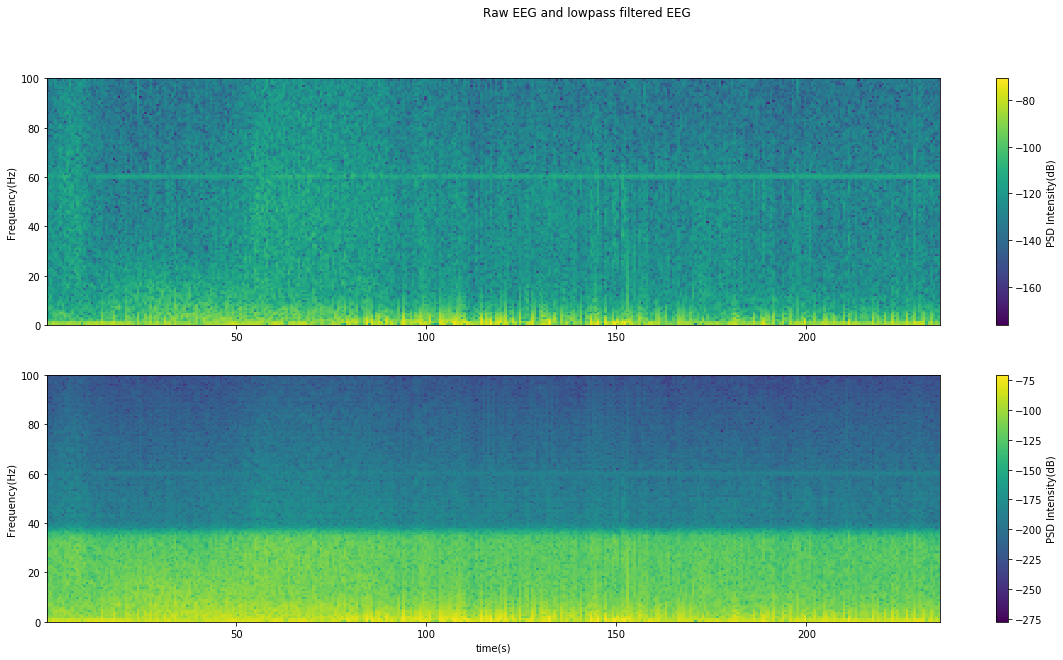

In [9]:
fig, axs = plt.subplots(2,figsize=(20,10))
fig.suptitle('Filtering EEG data(Lowpass)')
axs[0].plot(times, EEG_raw[0])
axs[1].plot(times, EEG_lowpass_filt[0])
plt.xlabel('time(s)')

fig = plt.figure(figsize=(20,10))
fig.suptitle('Raw EEG and lowpass filtered EEG')
plt.subplot(2,1,1)
plt.specgram(EEG_raw[0],Fs=sfreq)
cb = plt.colorbar()
cb.set_label('PSD Intensity(dB)')
plt.ylabel('Frequency(Hz)')
plt.subplot(2,1,2)
plt.specgram(EEG_lowpass_filt[0],Fs=sfreq)
cb = plt.colorbar()
cb.set_label('PSD Intensity(dB)')
plt.xlabel('time(s)')
plt.ylabel('Frequency(Hz)')

Text(0, 0.5, 'Frequency(Hz)')

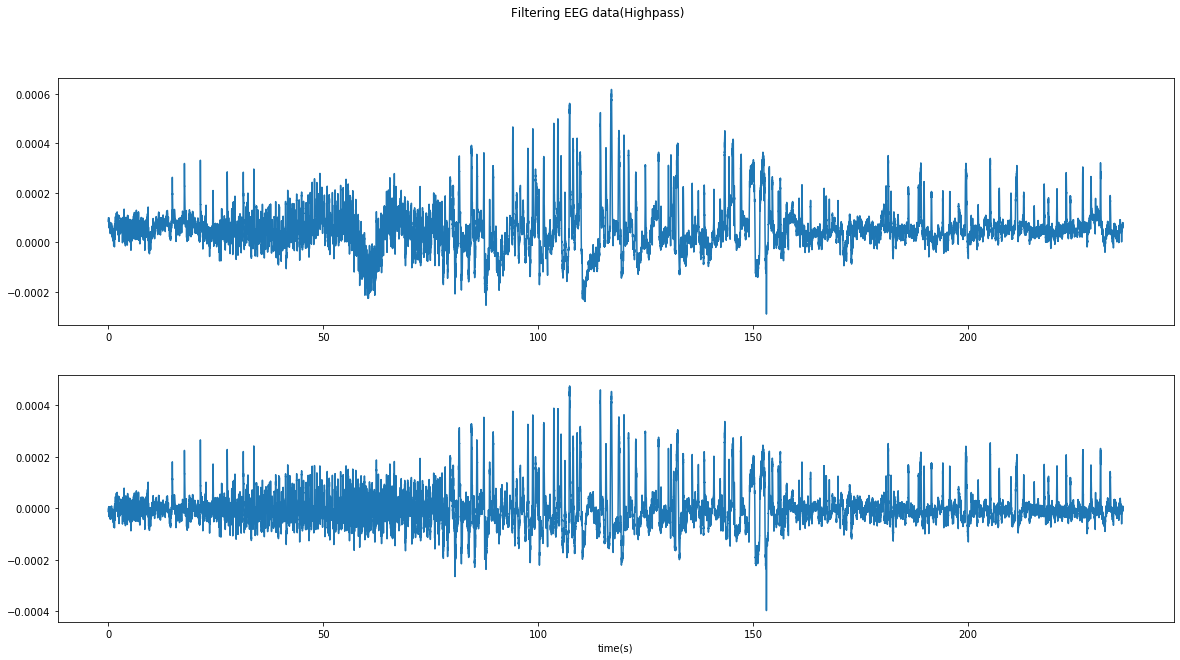

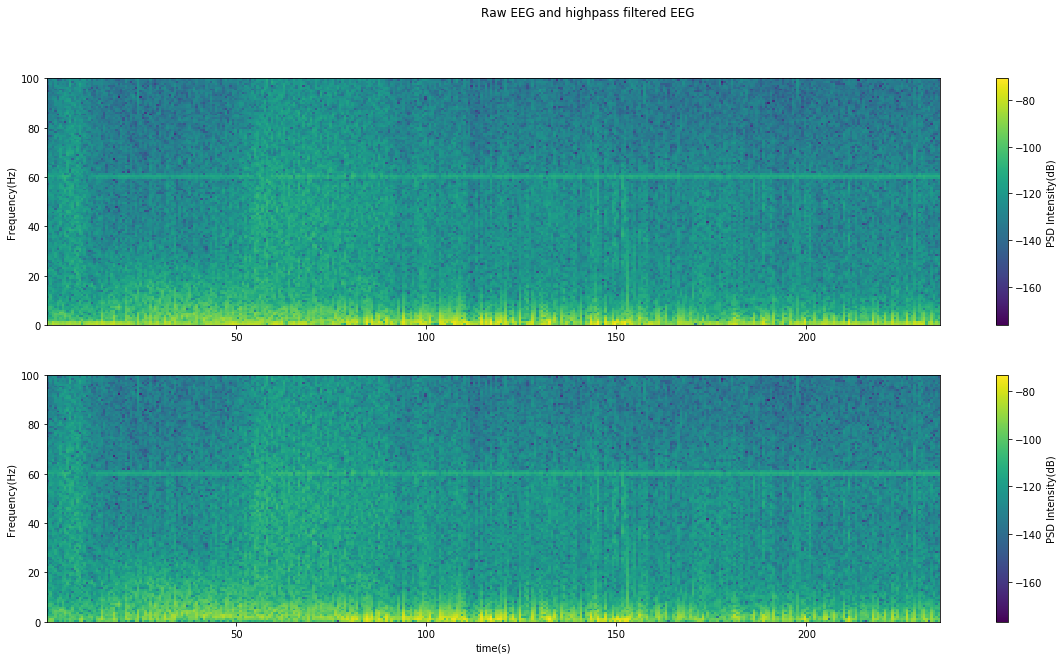

In [10]:
fig, axs = plt.subplots(2,figsize=(20,10))
fig.suptitle('Filtering EEG data(Highpass)')
axs[0].plot(times, EEG_raw[0])
axs[1].plot(times, EEG_highpass_filt[0])
plt.xlabel('time(s)')

fig = plt.figure(figsize=(20,10))
fig.suptitle('Raw EEG and highpass filtered EEG')
plt.subplot(2,1,1)
plt.specgram(EEG_raw[0],Fs=sfreq)
cb = plt.colorbar()
cb.set_label('PSD Intensity(dB)')
plt.ylabel('Frequency(Hz)')
plt.subplot(2,1,2)
plt.specgram(EEG_highpass_filt[0],Fs=sfreq)
cb = plt.colorbar()
cb.set_label('PSD Intensity(dB)')
plt.xlabel('time(s)')
plt.ylabel('Frequency(Hz)')

Text(0, 0.5, 'Frequency(Hz)')

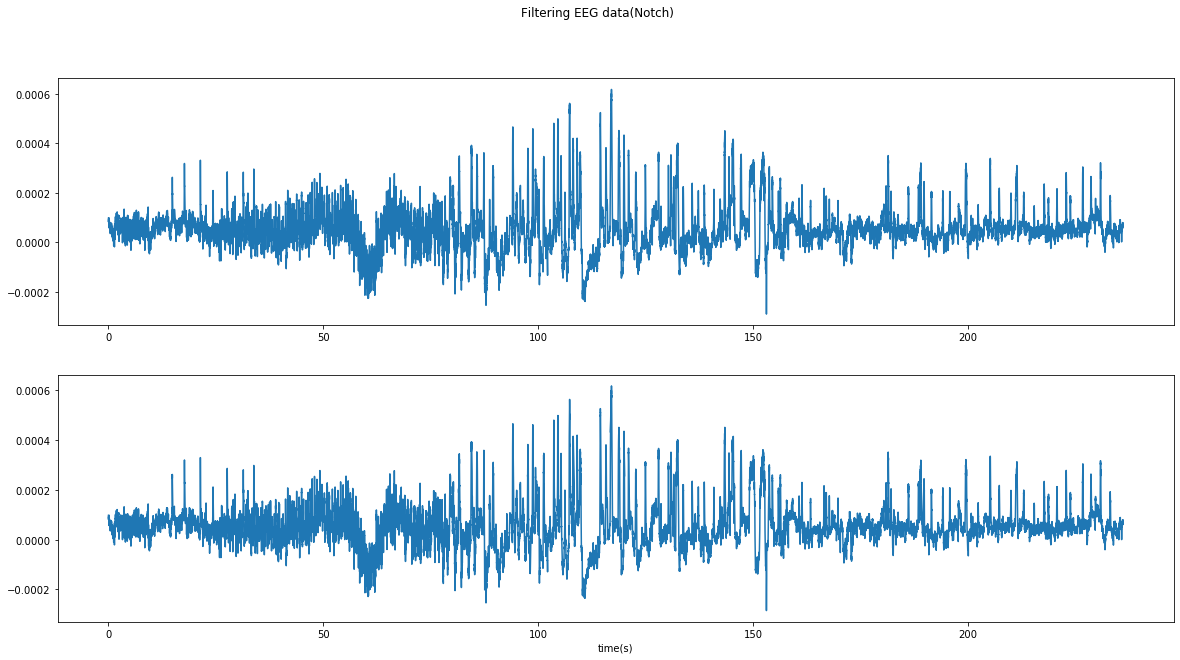

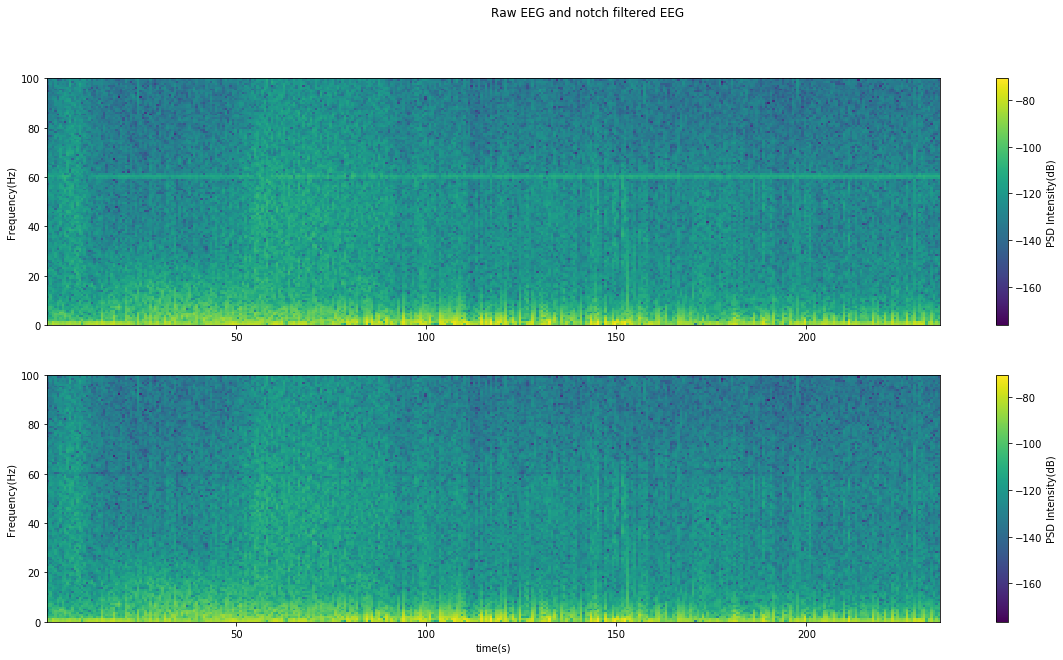

In [11]:
fig, axs = plt.subplots(2,figsize=(20,10))
fig.suptitle('Filtering EEG data(Notch)')
axs[0].plot(times, EEG_raw[0])
axs[1].plot(times, EEG_notch_filt[0])
plt.xlabel('time(s)')

fig = plt.figure(figsize=(20,10))
fig.suptitle('Raw EEG and notch filtered EEG')
plt.subplot(2,1,1)
plt.specgram(EEG_raw[0],Fs=sfreq)
cb = plt.colorbar()
cb.set_label('PSD Intensity(dB)')
plt.ylabel('Frequency(Hz)')
plt.subplot(2,1,2)
plt.specgram(EEG_notch_filt[0],Fs=sfreq)
cb = plt.colorbar()
cb.set_label('PSD Intensity(dB)')
plt.xlabel('time(s)')
plt.ylabel('Frequency(Hz)')